# Garmin Daily Summary Analysis
I've had my garmin forerunner 245 music since January and wanted to see what my days and weeks looked like.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 999)


In [45]:
df_days_avg = pd.read_csv('garmin_days_summary.csv')


In [46]:
df_days_avg.head()


,day,hr_avg,hr_min,hr_max,rhr,inactive_hr,weight,intensity_time,moderate_activity_time,vigorous_activity_time,steps,steps_goal_percent,floors,floors_goal_percent,sleep_avg,rem_sleep_avg,stress_avg,calories_avg,calories_bmr_avg,calories_active_avg,calories_consumed_avg,calories_goal,activities,activities_calories,activities_distance,hydration_goal,hydration_avg,sweat_loss_avg,spo2_avg,spo2_min,rr_waking_avg,rr_max,rr_min,bb_max,bb_min
0,2023-03-23,66.8,54.0,83.0,NaN,57.0,NaN,00:00:00.000000,00:00:00.000000,00:00:00.000000,187,NaN,0.0,NaN,00:00:00.000000,00:00:00.000000,35.4,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-22,68.3,35.0,177.0,46.0,66.1,244.4,01:22:00.000000,00:12:00.000000,00:35:00.000000,7929,69.0,0.0,0.0,07:58:00.000000,02:01:00.000000,24.0,3354.0,2613.0,741.0,NaN,2820.0,4.0,558.0,1.7,100.0,0.0,9.0,NaN,NaN,15.0,24.0,11.0,62.0,6.0
2,2023-03-21,72.4,46.0,169.0,48.0,60.8,243.6,00:45:00.000000,00:03:00.000000,00:21:00.000000,13393,118.0,0.0,0.0,08:01:00.000000,00:56:00.000000,28.0,3601.0,2608.0,993.0,0.0,2820.0,1.0,295.0,1.7,100.0,0.0,5.0,NaN,NaN,13.0,24.0,9.0,88.0,9.0
3,2023-03-20,59.3,45.0,91.0,47.0,61.3,242.0,00:00:00.000000,00:00:00.000000,00:00:00.000000,505,4.0,0.0,0.0,09:46:00.000000,02:23:00.000000,20.0,2602.0,2599.0,3.0,0.0,2820.0,NaN,NaN,NaN,100.0,NaN,NaN,90.0,85.0,13.0,24.0,11.0,88.0,11.0
4,2023-03-19,73.0,46.0,166.0,48.0,60.3,240.0,01:02:00.000000,00:02:00.000000,00:30:00.000000,14558,139.0,0.0,0.0,08:00:00.000000,00:34:00.000000,22.0,3357.0,2588.0,769.0,0.0,2820.0,1.0,471.0,2.7,100.0,0.0,7.0,93.0,85.0,13.0,25.0,9.0,68.0,5.0


**Thoughts on this data?**

convert sleep time to HH.MM format example '07:58:00.000000' -> '7.58'

In [47]:
df_days_avg.columns


Index(['day', 'hr_avg', 'hr_min', 'hr_max', 'rhr', 'inactive_hr', 'weight',
       'intensity_time', 'moderate_activity_time', 'vigorous_activity_time',
       'steps', 'steps_goal_percent', 'floors', 'floors_goal_percent',
       'sleep_avg', 'rem_sleep_avg', 'stress_avg', 'calories_avg',
       'calories_bmr_avg', 'calories_active_avg', 'calories_consumed_avg',
       'calories_goal', 'activities', 'activities_calories',
       'activities_distance', 'hydration_goal', 'hydration_avg',
       'sweat_loss_avg', 'spo2_avg', 'spo2_min', 'rr_waking_avg', 'rr_max',
       'rr_min', 'bb_max', 'bb_min'],
      dtype='object')

In [48]:
df_days_avg.shape


(74, 35)

In [49]:
df_summary = df_days_avg[['day', 'hr_avg', 'hr_min', 'hr_max', 'rhr', 'inactive_hr', 'weight',
                          'intensity_time', 'moderate_activity_time', 'vigorous_activity_time',
                          'steps', 'steps_goal_percent',
                          'sleep_avg', 'rem_sleep_avg', 'stress_avg', 'calories_avg',
                          'calories_bmr_avg', 'calories_active_avg', 'calories_consumed_avg',
                          'calories_goal', 'activities', 'activities_calories',
                          'activities_distance', 'sweat_loss_avg', ]]


In [50]:
df_summary.head()


,day,hr_avg,hr_min,hr_max,rhr,inactive_hr,weight,intensity_time,moderate_activity_time,vigorous_activity_time,steps,steps_goal_percent,sleep_avg,rem_sleep_avg,stress_avg,calories_avg,calories_bmr_avg,calories_active_avg,calories_consumed_avg,calories_goal,activities,activities_calories,activities_distance,sweat_loss_avg
0,2023-03-23,66.8,54.0,83.0,NaN,57.0,NaN,00:00:00.000000,00:00:00.000000,00:00:00.000000,187,NaN,00:00:00.000000,00:00:00.000000,35.4,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-22,68.3,35.0,177.0,46.0,66.1,244.4,01:22:00.000000,00:12:00.000000,00:35:00.000000,7929,69.0,07:58:00.000000,02:01:00.000000,24.0,3354.0,2613.0,741.0,NaN,2820.0,4.0,558.0,1.7,9.0
2,2023-03-21,72.4,46.0,169.0,48.0,60.8,243.6,00:45:00.000000,00:03:00.000000,00:21:00.000000,13393,118.0,08:01:00.000000,00:56:00.000000,28.0,3601.0,2608.0,993.0,0.0,2820.0,1.0,295.0,1.7,5.0
3,2023-03-20,59.3,45.0,91.0,47.0,61.3,242.0,00:00:00.000000,00:00:00.000000,00:00:00.000000,505,4.0,09:46:00.000000,02:23:00.000000,20.0,2602.0,2599.0,3.0,0.0,2820.0,NaN,NaN,NaN,NaN
4,2023-03-19,73.0,46.0,166.0,48.0,60.3,240.0,01:02:00.000000,00:02:00.000000,00:30:00.000000,14558,139.0,08:00:00.000000,00:34:00.000000,22.0,3357.0,2588.0,769.0,0.0,2820.0,1.0,471.0,2.7,7.0


In [51]:
df_summary['day'] = pd.to_datetime(df_summary['day'])


/tmp/ipykernel_53914/3164302938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary['day'] = pd.to_datetime(df_summary['day'])


In [52]:
df_summary.dtypes


day                       datetime64[ns]
hr_avg                           float64
hr_min                           float64
hr_max                           float64
rhr                              float64
inactive_hr                      float64
weight                           float64
intensity_time                    object
moderate_activity_time            object
vigorous_activity_time            object
steps                              int64
steps_goal_percent               float64
sleep_avg                         object
rem_sleep_avg                     object
stress_avg                       float64
calories_avg                     float64
calories_bmr_avg                 float64
calories_active_avg              float64
calories_consumed_avg            float64
calories_goal                    float64
activities                       float64
activities_calories              float64
activities_distance              float64
sweat_loss_avg                   float64
dtype: object

In [53]:
df_summary = df_summary.sort_values(
    by=['day'], ascending=True, ignore_index=True)
df_summary


,day,hr_avg,hr_min,hr_max,rhr,inactive_hr,weight,intensity_time,moderate_activity_time,vigorous_activity_time,steps,steps_goal_percent,sleep_avg,rem_sleep_avg,stress_avg,calories_avg,calories_bmr_avg,calories_active_avg,calories_consumed_avg,calories_goal,activities,activities_calories,activities_distance,sweat_loss_avg
0,2023-01-09,85.0,55.0,171.0,60.0,90.7,267.4,01:31:00.000000,00:13:00.000000,00:39:00.000000,12584,125.0,00:00:00.000000,00:00:00.000000,30.0,4028.0,2740.0,1288.0,NaN,NaN,6.0,769.0,2.1,11.0
1,2023-01-10,72.9,45.0,167.0,48.0,65.1,262.6,00:41:00.000000,00:05:00.000000,00:18:00.000000,11179,108.0,08:24:00.000000,00:49:00.000000,31.0,3841.0,2713.0,1128.0,0.0,NaN,2.0,305.0,1.4,4.0
2,2023-01-11,69.6,48.0,174.0,51.0,60.7,262.8,01:42:00.000000,00:14:00.000000,00:44:00.000000,7662,73.0,03:45:00.000000,01:24:00.000000,29.0,3685.0,2714.0,971.0,2574.0,2843.0,3.0,854.0,2.4,13.0
3,2023-01-12,71.6,44.0,175.0,46.0,59.6,261.2,01:23:00.000000,00:19:00.000000,00:32:00.000000,6122,60.0,07:19:00.000000,01:53:00.000000,32.0,3625.0,2705.0,920.0,2340.0,2593.0,3.0,699.0,1.0,12.0
4,2023-01-13,79.7,46.0,173.0,49.0,64.1,261.0,00:58:00.000000,00:10:00.000000,00:24:00.000000,15275,163.0,07:23:00.000000,01:24:00.000000,34.0,4194.0,2704.0,1490.0,2725.0,2593.0,2.0,424.0,1.8,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023-03-19,73.0,46.0,166.0,48.0,60.3,240.0,01:02:00.000000,00:02:00.000000,00:30:00.000000,14558,139.0,08:00:00.000000,00:34:00.000000,22.0,3357.0,2588.0,769.0,0.0,2820.0,1.0,471.0,2.7,7.0
70,2023-03-20,59.3,45.0,91.0,47.0,61.3,242.0,00:00:00.000000,00:00:00.000000,00:00:00.000000,505,4.0,09:46:00.000000,02:23:00.000000,20.0,2602.0,2599.0,3.0,0.0,2820.0,NaN,NaN,NaN,NaN
71,2023-03-21,72.4,46.0,169.0,48.0,60.8,243.6,00:45:00.000000,00:03:00.000000,00:21:00.000000,13393,118.0,08:01:00.000000,00:56:00.000000,28.0,3601.0,2608.0,993.0,0.0,2820.0,1.0,295.0,1.7,5.0
72,2023-03-22,68.3,35.0,177.0,46.0,66.1,244.4,01:22:00.000000,00:12:00.000000,00:35:00.000000,7929,69.0,07:58:00.000000,02:01:00.000000,24.0,3354.0,2613.0,741.0,NaN,2820.0,4.0,558.0,1.7,9.0


# Weight Loss 

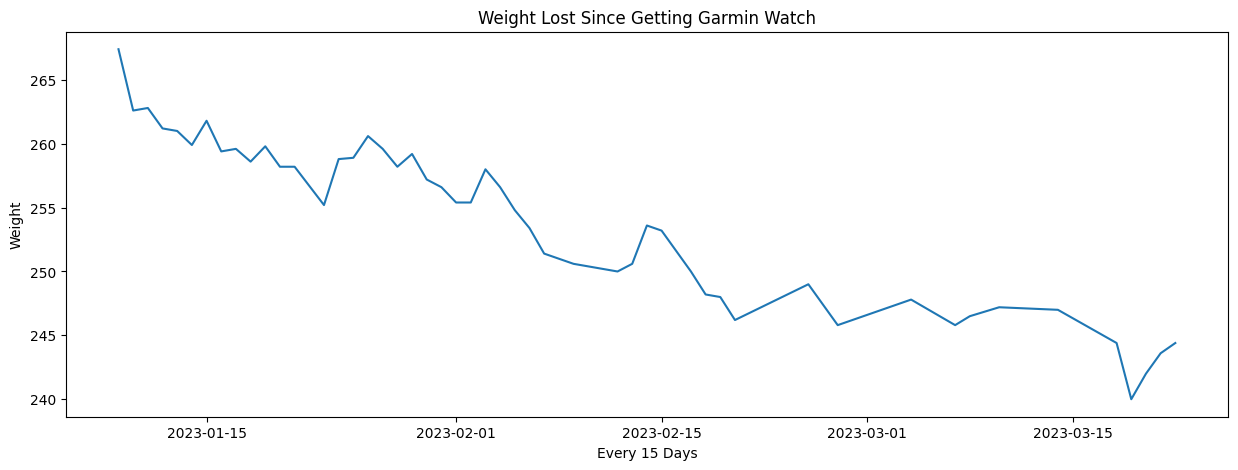

In [54]:
fig, ax1 = plt.subplots(figsize=(15, 5))

weight_loss = sns.lineplot(
    x='day', y='weight', data=df_summary, ax=ax1, markers=False, dashes=True)
weight_loss.set_xlabel('Every 15 Days')
weight_loss.set_ylabel('Weight')
weight_loss.set_title('Weight Lost Since Getting Garmin Watch')


plt.show()


# Average Calories Burned per Day and per Activity

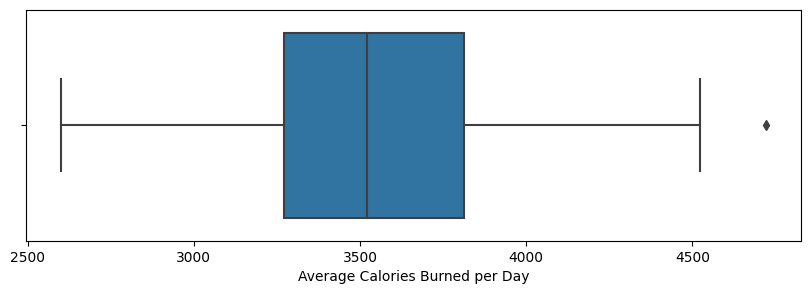

In [55]:
fig, ax = plt.subplots(figsize=(10, 3))

calories_average = sns.boxplot(x='calories_avg', data=df_summary, )
calories_average.set_xlabel('Average Calories Burned per Day')

plt.show()


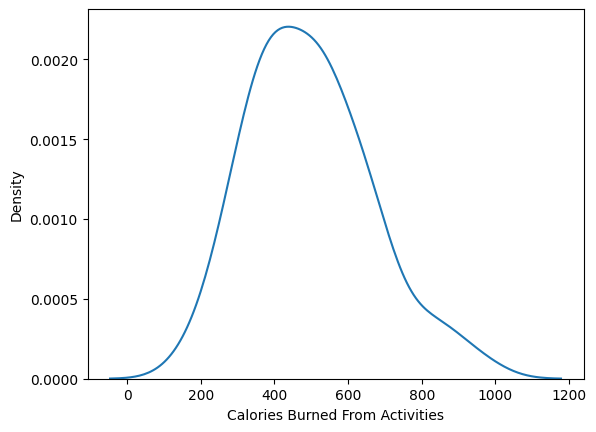

In [56]:
burned_calories = sns.kdeplot(x='activities_calories', data=df_summary, )
burned_calories.set_xlabel('Calories Burned From Activities')

plt.show()

In [57]:
df_summary['sleep_avg'] = df_summary['sleep_avg'].apply(
    lambda x: "{}.{}".format(x.split(':', 2)[0], x.split(':', 2)[1]))

In [58]:
df_summary['sleep_avg'] = pd.to_numeric(df_summary['sleep_avg'])

In [59]:
df_summary['day_of_week'] = df_summary['day'].apply(lambda x: x.day_name())

In [60]:
df_days_avg = df_summary.groupby(['day_of_week']).agg({
    'activities_distance': 'mean',
    'calories_avg': 'mean',
    'steps': 'mean',
    'sleep_avg': 'mean',
    'stress_avg': 'mean',
    'activities': 'mean'
}).reset_index()

df_days_avg

,day_of_week,activities_distance,calories_avg,steps,sleep_avg,stress_avg,activities
0,Friday,1.857143,3903.400000,13411.900000,6.420000,36.800000,2.285714
1,Monday,1.625000,3499.181818,10503.000000,7.819091,28.000000,2.375000
2,Saturday,1.188889,3788.100000,12931.100000,7.962000,31.100000,1.888889
3,Sunday,2.025000,3385.700000,11470.700000,6.538000,30.000000,1.625000
4,Thursday,2.000000,3253.100000,6199.000000,7.230000,29.763636,2.000000
5,Tuesday,1.790909,3617.090909,12632.363636,8.288182,29.636364,2.090909
6,Wednesday,2.580000,3309.363636,7517.181818,6.172727,27.454545,2.100000


# Daily Miles, Stress, and Actities average

Text(0, 0.5, '# of Activities')

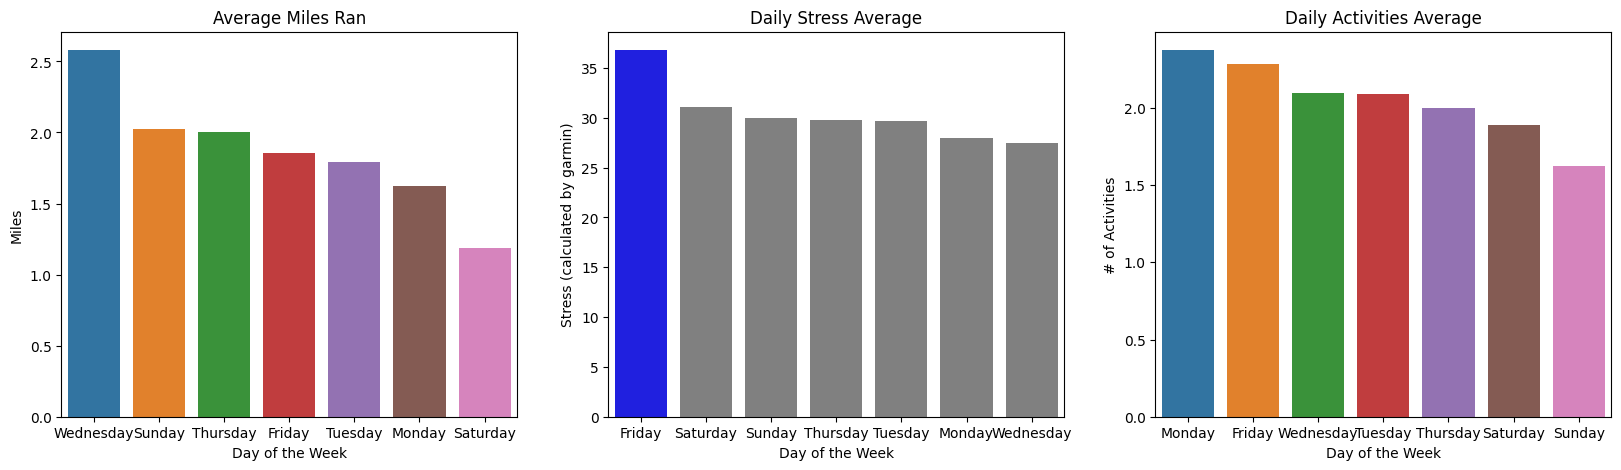

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))


daily_distance = sns.barplot(x='day_of_week', y='activities_distance', data=df_days_avg, order=df_days_avg.sort_values(
    by='activities_distance', ascending=False).day_of_week, ax=ax[0], )
daily_distance.set_title('Average Miles Ran')
daily_distance.set_xlabel('Day of the Week')
daily_distance.set_ylabel('Miles')


daily_stress = sns.barplot(x='day_of_week', y='stress_avg', data=df_days_avg, order=df_days_avg.sort_values(by='stress_avg',
                           ascending=False).day_of_week, palette=['blue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', ], ax=ax[1])
daily_stress.set_title('Daily Stress Average')
daily_stress.set_xlabel('Day of the Week')
daily_stress.set_ylabel('Stress (calculated by garmin)')


activities_avg = sns.barplot(x='day_of_week', y='activities', data=df_days_avg, order=df_days_avg.sort_values(
    by='activities', ascending=False).day_of_week)
activities_avg.set_title('Daily Activities Average')
activities_avg.set_xlabel('Day of the Week')
activities_avg.set_ylabel('# of Activities')

In [62]:
df_days_sum = df_summary.groupby(['day_of_week']).agg({
    'activities_distance': 'sum',
    'calories_avg': 'sum',
    'steps': 'sum',
    'sleep_avg': 'sum',
    'stress_avg': 'sum',
    'activities': 'sum'
}).reset_index()

df_days_sum.describe()


,activities_distance,calories_avg,steps,sleep_avg,stress_avg,activities
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,16.628571,36855.000000,111929.142857,76.258571,320.342857,18.142857
std,5.116872,2737.668899,26813.740423,10.591354,23.604156,3.287784
min,10.700000,32531.000000,68189.000000,64.200000,300.000000,13.000000
25%,13.000000,35130.000000,98698.000000,66.640000,305.000000,16.500000
50%,16.200000,37881.000000,115533.000000,79.530000,311.000000,18.000000
75%,18.850000,38762.500000,131715.000000,82.815000,326.700000,20.000000
max,25.800000,39788.000000,138956.000000,91.170000,368.000000,23.000000


In [63]:
df_summary['week'] = df_summary['day'].apply(lambda x: x.isocalendar().week)


In [64]:
df_weeks = df_summary.groupby(['week']).agg({
    'activities_distance': 'mean',
    'steps': 'mean',
    'rhr': 'mean',
    'hr_max': 'mean',
    'sleep_avg': 'mean'
}).reset_index()
df_weeks


,week,activities_distance,steps,rhr,hr_max,sleep_avg
0,2,1.716667,9554.285714,50.714286,164.285714,5.871429
1,3,1.900000,10507.571429,47.857143,151.714286,8.448571
2,4,1.085714,10663.285714,47.857143,163.428571,7.398571
3,5,1.871429,12166.571429,48.000000,166.571429,8.067143
4,6,2.300000,11912.428571,48.142857,169.714286,6.342857
5,7,1.650000,10772.857143,47.857143,154.428571,7.987143
6,8,2.620000,11109.142857,49.857143,151.857143,7.270000
7,9,1.900000,10545.285714,48.857143,153.857143,7.444286
8,10,2.057143,11308.000000,47.571429,158.857143,7.915714
9,11,1.900000,10244.857143,48.285714,134.857143,5.934286
